## Car Price Prediction

The Case Study is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
# Reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [199]:
# Let's take a look at the first few rows
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [200]:
# Summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [201]:
# Symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [202]:
# Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
# pressure) or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [203]:
# Drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

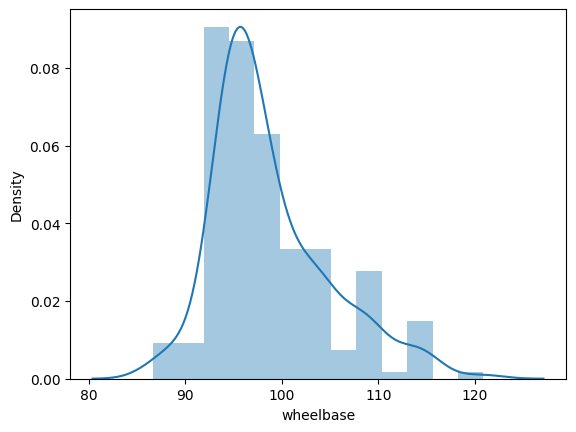

In [204]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

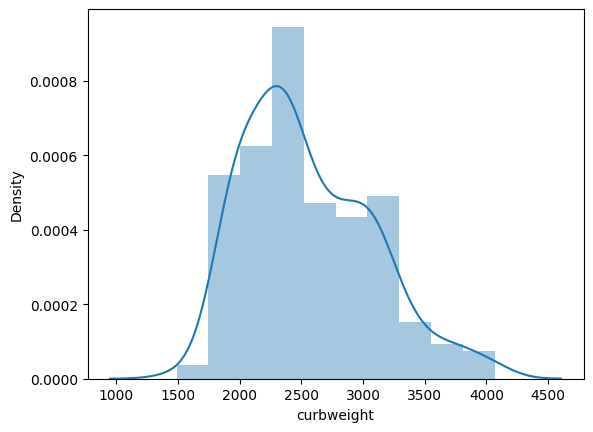

In [205]:
# Curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

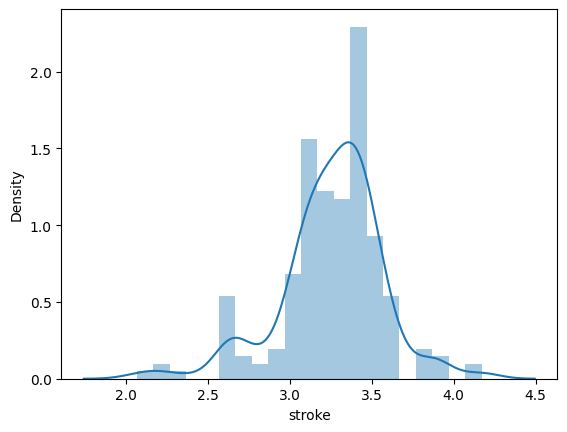

In [206]:
# Stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

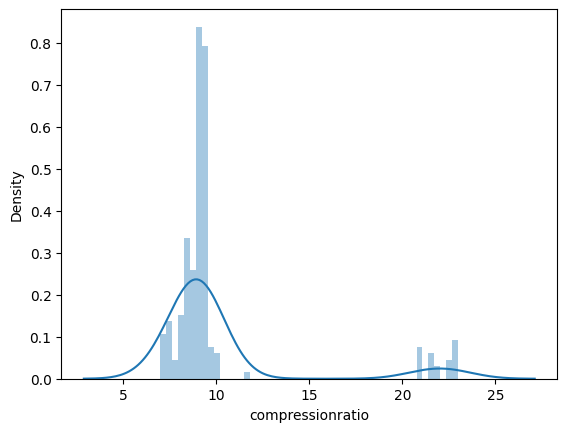

In [207]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

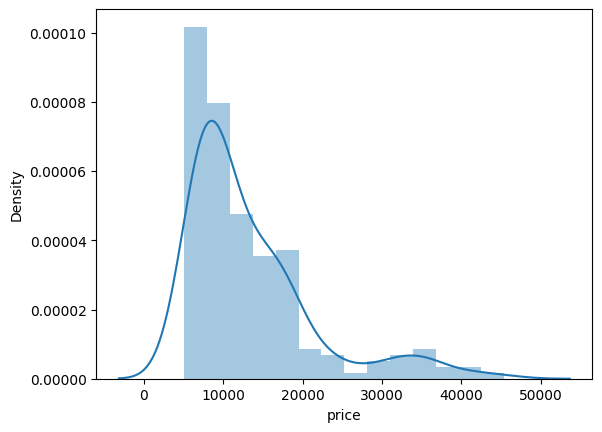

In [208]:
# Target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [209]:
# All numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

Here, as you might notice, `car_ID` isn't of any use to building a linear regression model. Hence, we drop it.

In [210]:
# Dropping car_ID 
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 2000x1000 with 0 Axes>

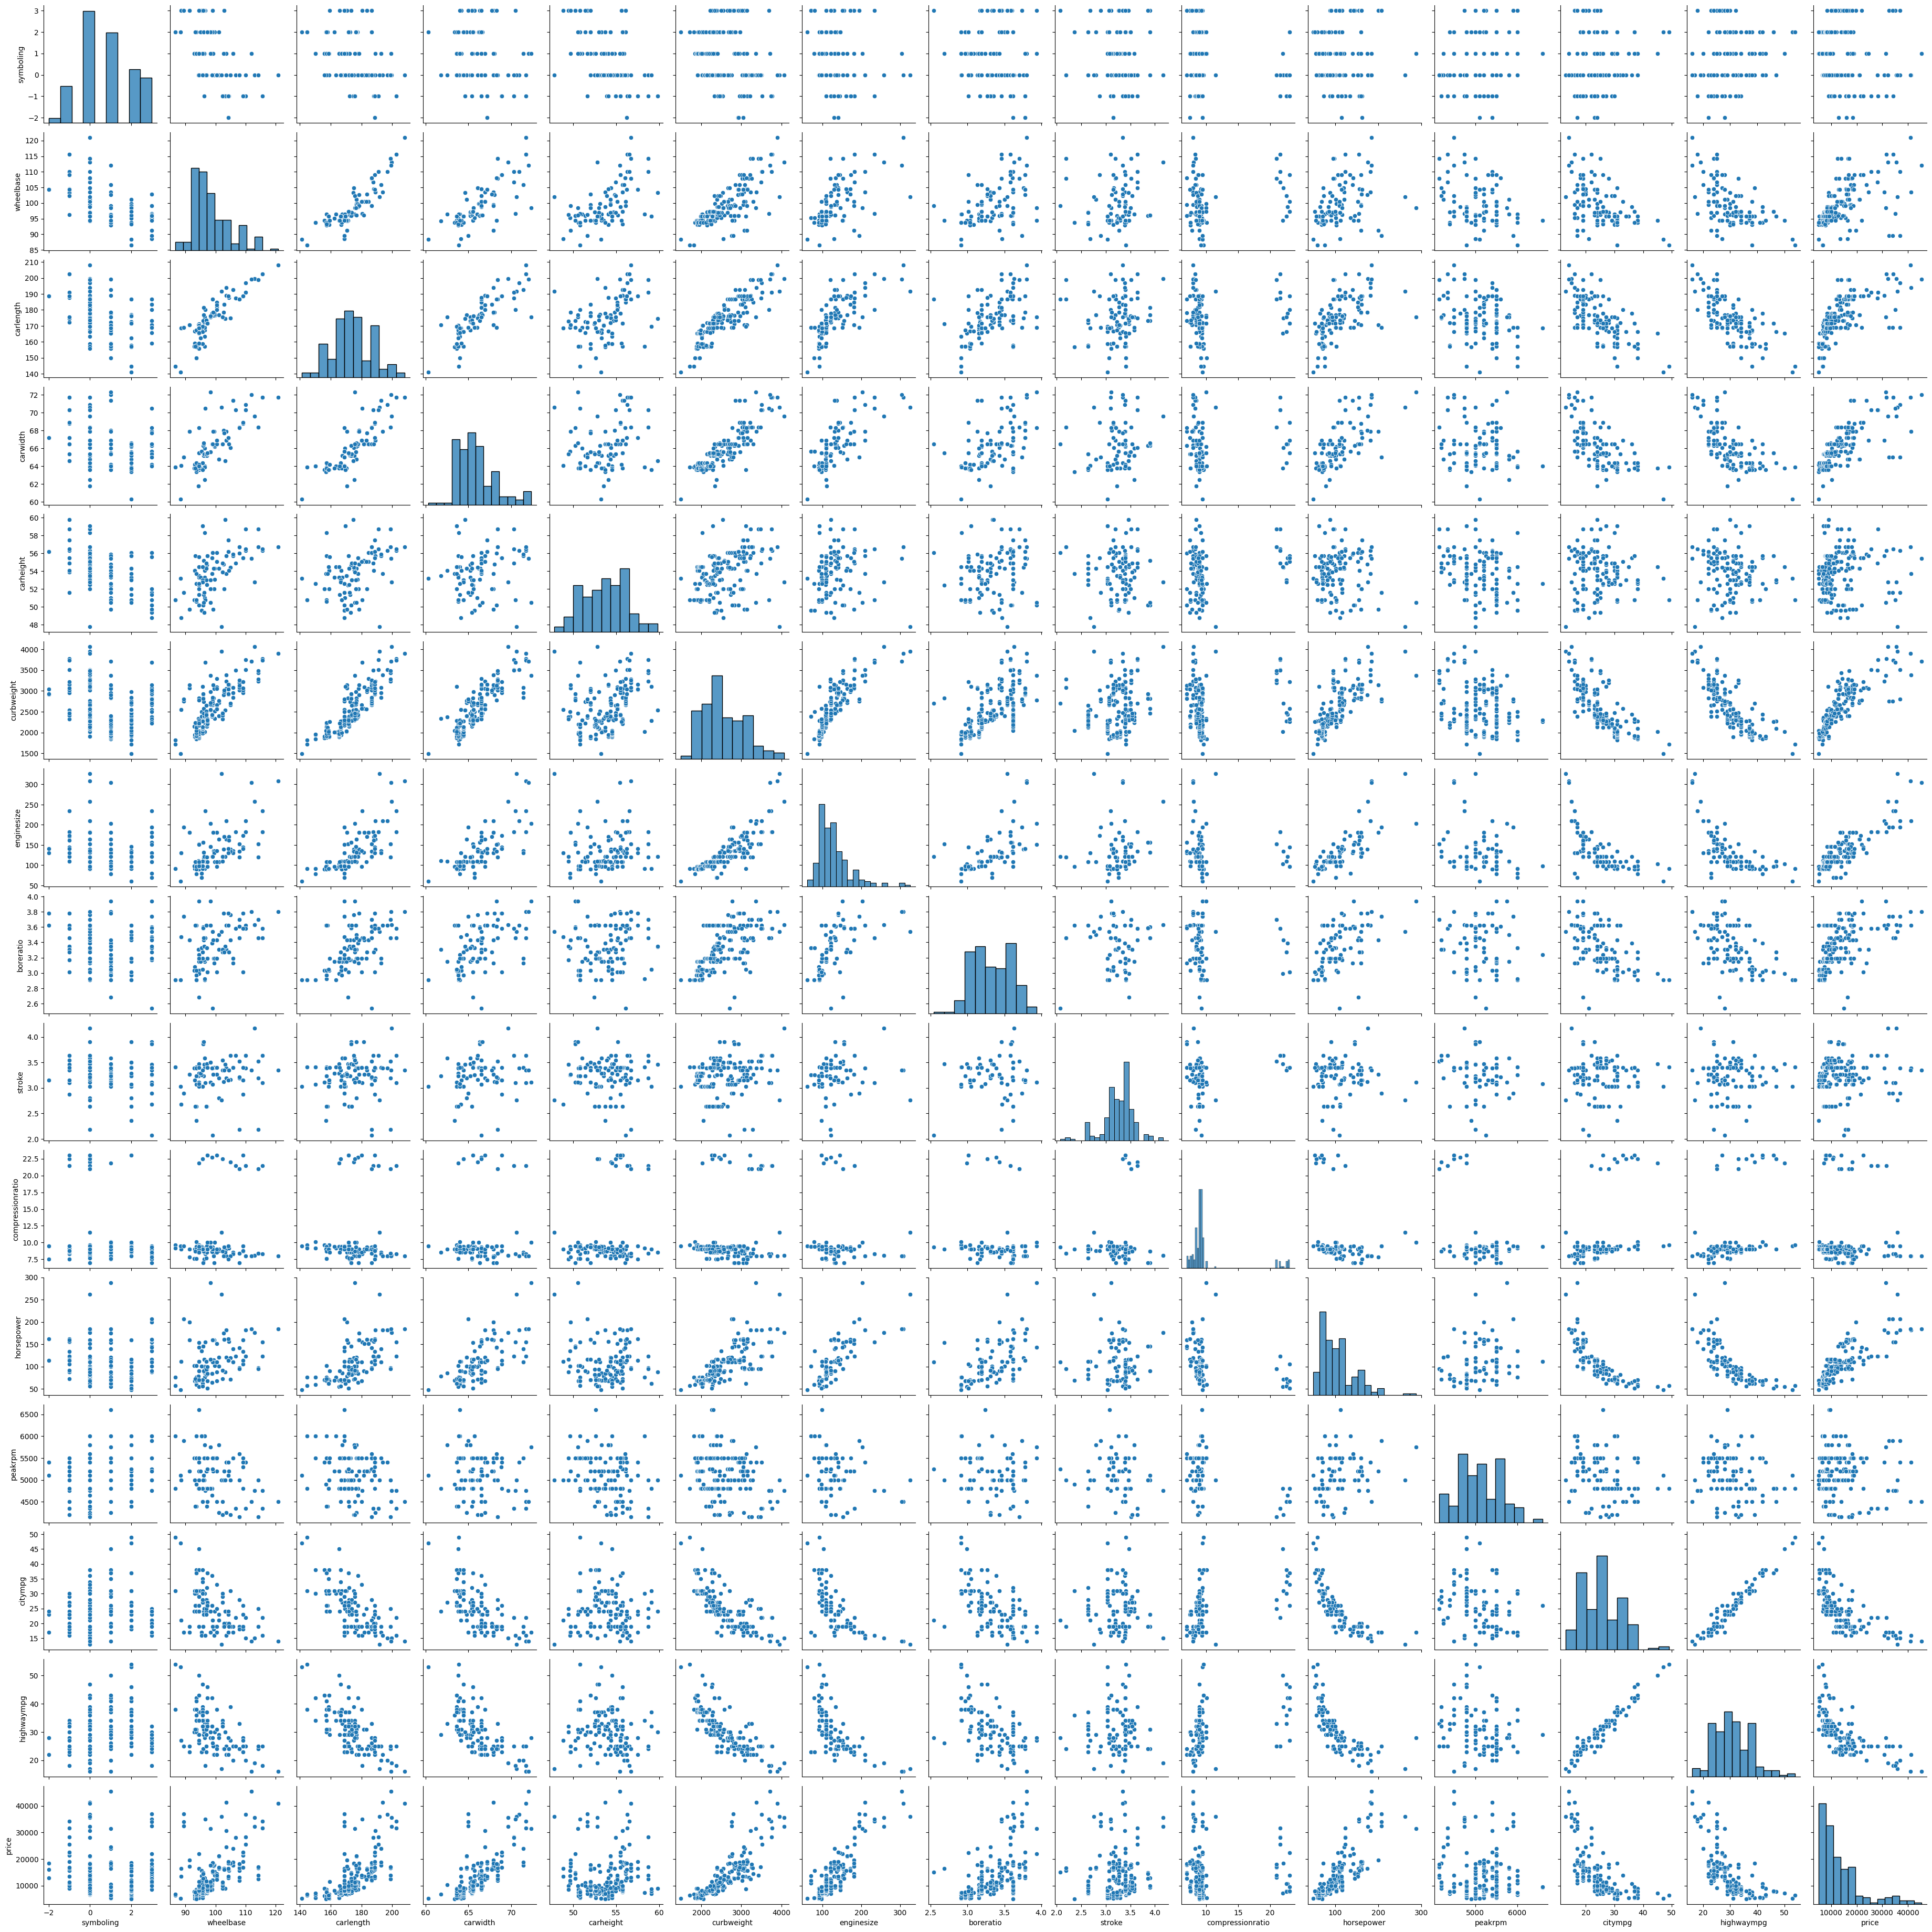

In [211]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [212]:
# Correlation matrix
cor = cars_numeric.corr()
cor

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

Let's plot the correlations on a heatmap for better visualisation

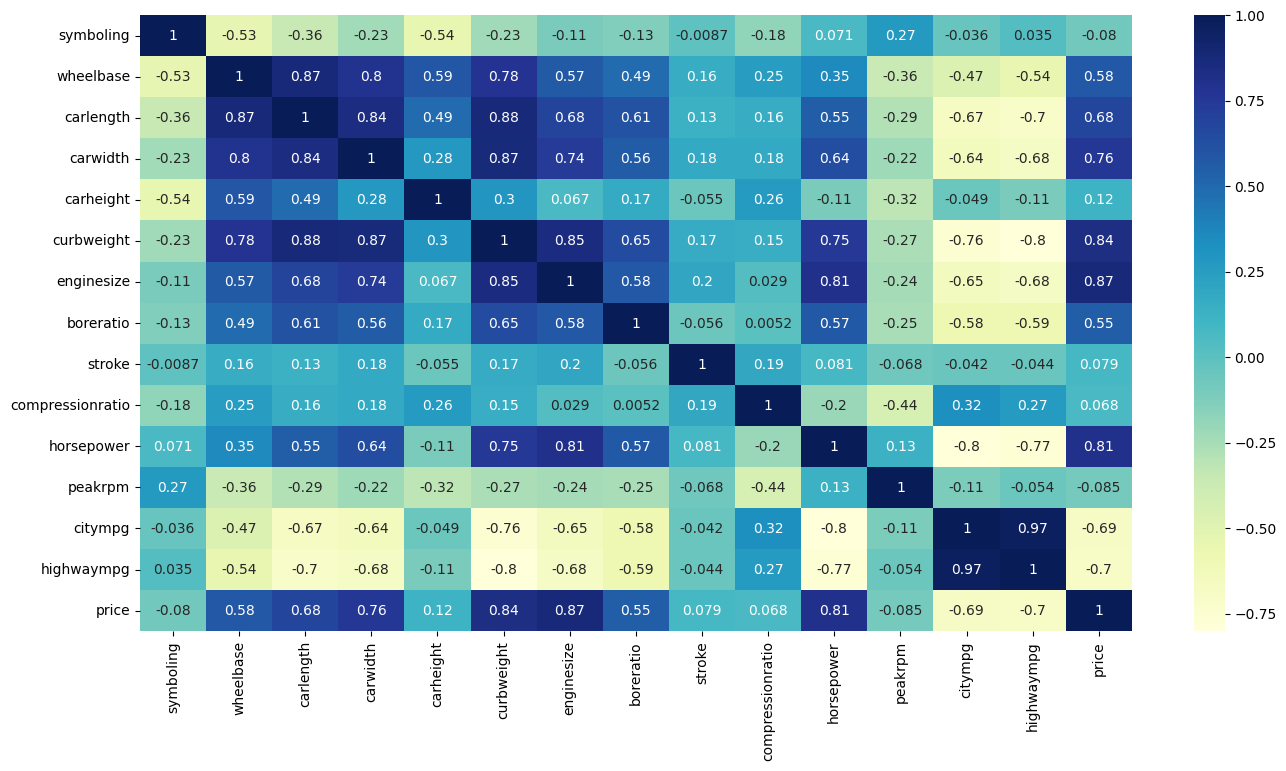

In [213]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity.

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format.

In [214]:
# Variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Next, we need to extract the company name from the column `CarName`. 

In [215]:
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the car name is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. Let's see how we can do that.

In [216]:
# Extracting carname
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

The ```car_company``` variable looks okay now. Let's now drop the car name variable since it's of no use for our linear model.

In [217]:
# Drop carname variable
cars = cars.drop('CarName', axis=1)

In [218]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [219]:
# Let's check for any outliers
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

In [220]:
cars.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0          front       88.6      168.8  ...         130        mpfi   
1          front       88.6      168.8  ...         130        mpfi   
2          front       94.5      171.2  ...         152        mpfi   
3          front       99.8      176.6  ...         109        mpfi   
4          front       99.4      176.6  ...         136        mpfi   

   boreratio stroke compressionratio  horsepower peakrpm  citympg  highwaympg  \
0       3.47   2.68              9.0         111    5000       21          27   
1       3.47   2.68              9.0         111    5000       21          27   
2       2.68   3.47              9.0         154    5000       19          26   
3       3.19   3.40             10.0         102    5500       24          30   
4       3.19   3.40              8.0         115    5500       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 25 columns]

Notice that two of the variables - `doornumber` and `cylindernumber` are numeric types with the numbers written as words. Let's map these to actual numbers to avoid too many dummy variable creations ahead.

Note that you can also treat them as categorical variables (these two and also, `symboling`) and create dummy variables for them. It's upto you.

In [221]:
# Checking the different levels of 'cylindernumber'
cars['cylindernumber'].astype('category').value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [222]:
# Checking the different levels of 'doornumber'
cars['doornumber'].astype('category').value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [223]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(num_map)

Let's now create dummy variables for the categorical variables

In [224]:
# Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

fueltype aspiration      carbody drivewheel enginelocation enginetype  \
0      gas        std  convertible        rwd          front       dohc   
1      gas        std  convertible        rwd          front       dohc   
2      gas        std    hatchback        rwd          front       ohcv   
3      gas        std        sedan        fwd          front        ohc   
4      gas        std        sedan        4wd          front        ohc   

  fuelsystem  
0       mpfi  
1       mpfi  
2       mpfi  
3       mpfi  
4       mpfi

In [225]:
# Convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True).astype('int')
cars_dummies.head()

fueltype_gas  aspiration_turbo  carbody_hardtop  carbody_hatchback  \
0             1                 0                0                  0   
1             1                 0                0                  0   
2             1                 0                0                  1   
3             1                 0                0                  0   
4             1                 0                0                  0   

   carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  \
0              0              0               0               1   
1              0              0               0               1   
2              0              0               0               1   
3              1              0               1               0   
4              1              0               0               0   

   enginelocation_rear  enginetype_dohcv  ...  enginetype_ohcf  \
0                    0                 0  ...                0   
1                    0                 0  ...                0   
2                    0                 0  ...                0   
3                    0                 0  ...                0   
4                    0                 0  ...                0   

   enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  \
0                0                 0                0                0   
1                0                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 22 columns]

In [226]:
# Drop categorical variable columns
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [227]:
# Concatenate dummy variables with X
cars = pd.concat([cars, cars_dummies], axis=1)

In [228]:
# Let's check the first few rows
cars.head()

car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  ...  enginetype_ohcf  \
0        2548               4         130  ...                0   
1        2548               4         130  ...                0   
2        2823               6         152  ...                0   
3        2337               4         109  ...                0   
4        2824               5         136  ...                0   

   enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  \
0                0                 0                0                0   
1                0                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 40 columns]

Notice that the `car_ID` column is still there. We had dropped it from the 'cars_numeric' dataframe but not from the original. Let's drop it now.

In [229]:
# Drop the 'car_ID' column
cars.drop('car_ID', axis = 1, inplace = True)

## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [230]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [231]:
cars_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Let's scale all these columns using StandardScaler. You can use any other scaling method as well; it is totally up to you. Also, note that you had converted two other variables, viz., 'doornumber' and 'cylindernumber' to numeric types. So you would need to include them in the varlist as well

In [232]:
# Import the StandardScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [233]:
# Let's take a look at the train dataframe now
df_train.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122        0.6         1.0   0.244828   0.426016  0.291667   0.265487   
125        1.0         0.0   0.272414   0.452033  0.666667   0.212389   
166        0.6         0.0   0.272414   0.448780  0.308333   0.424779   
1          1.0         0.0   0.068966   0.450407  0.316667   0.088496   
199        0.2         1.0   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio  ...  enginetype_ohcf  \
122    0.272692             0.2    0.139623   0.230159  ...                0   
125    0.500388             0.2    0.339623   1.000000  ...                0   
166    0.314973             0.2    0.139623   0.444444  ...                0   
1      0.411171             0.2    0.260377   0.626984  ...                0   
199    0.647401             0.2    0.260377   0.746032  ...                0   

     enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  \
122                0                 0                1                0   
125                0                 0                0                0   
166                0                 0                0                0   
1                  0                 0                0                0   
199                0                 0                0                0   

     fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
122               0               0                0                0   
125               0               0                1                0   
166               0               0                1                0   
1                 0               0                1                0   
199               0               0                1                0   

     fuelsystem_spfi  
122                0  
125                0  
166                0  
1                  0  
199                0  

[5 rows x 39 columns]

As expected, the variables have been appropriately scaled.

In [234]:
# Split the train dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

### Building the first model with all the features

Let's now build our first model with all the features.

In [235]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [236]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 6.43445871e-02  3.02118873e-03  1.26350634e-01 -1.93145432e-02
  1.96655799e-01  9.39457427e-02  1.56157819e-01 -6.72918960e-01
  1.61565681e+00 -3.63094860e-01 -3.63441053e-01 -3.44007647e-01
  2.23206315e-01  1.23307492e-01 -4.19875888e-02  2.70935139e-01
 -1.44914092e-01  5.14326016e-02 -1.59856803e-01 -1.29245789e-01
 -1.15270212e-01 -1.36945155e-01 -1.00531209e-02  6.49839517e-02
  2.31015200e-01  2.09930613e-01 -6.59677710e-03  1.40104481e-01
  1.43562114e-01 -3.85798975e-02  2.77670427e-01  1.61942777e-02
  2.50361690e-02  1.44914092e-01  1.11022302e-16  2.08060335e-02
 -5.74331632e-02  0.00000000e+00]
0.04737825275398891


#### Model Building Using RFE

Now, you have close to 60 features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [237]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()

rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))  

[('symboling', False, 11),
 ('doornumber', False, 22),
 ('wheelbase', True, 1),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 9),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 14),
 ('highwaympg', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 5),
 ('carbody_wagon', False, 4),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 10),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 21),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 19),
 ('fuelsystem_4bbl', False, 17),
 ('fuelsystem_idi', False, 7),
 ('fuels

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [238]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  wheelbase  carwidth  curbweight  cylindernumber  enginesize  \
122    1.0   0.244828  0.291667    0.272692             0.2    0.139623   
125    1.0   0.272414  0.666667    0.500388             0.2    0.339623   
166    1.0   0.272414  0.308333    0.314973             0.2    0.139623   
1      1.0   0.068966  0.316667    0.411171             0.2    0.260377   
199    1.0   0.610345  0.575000    0.647401             0.2    0.260377   

     boreratio    stroke  compressionratio  horsepower  highwaympg  \
122   0.230159  0.525253           0.15000    0.083333    0.567568   
125   1.000000  0.464646           0.15625    0.395833    0.270270   
166   0.444444  0.449495           0.15000    0.266667    0.324324   
1     0.626984  0.247475           0.12500    0.262500    0.270270   
199   0.746032  0.484848           0.03125    0.475000    0.135135   

     fueltype_gas  enginelocation_rear  enginetype_dohcv  enginetype_ohc  \
122             1                    0                 0               1   
125             1                    0                 0               1   
166             1                    0                 0               0   
1               1                    0                 0               0   
199             1                    0                 0               1   

     enginetype_rotor  
122                 0  
125                 0  
166                 0  
1                   0  
199                 0

In [239]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     76.63
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.74e-56
Time:                        12:11:34   Log-Likelihood:                 181.95
No. Observations:                 143   AIC:                            -331.9
Df Residuals:                     127   BIC:                            -284.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4142    

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [240]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [241]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                 const  1152.66
8      compressionratio    62.77
11         fueltype_gas    61.37
5            enginesize    50.28
4        cylindernumber    28.99
3            curbweight    20.47
9            horsepower     9.76
6             boreratio     8.78
10           highwaympg     7.49
2              carwidth     6.65
1             wheelbase     5.14
7                stroke     4.95
15     enginetype_rotor     2.62
13     enginetype_dohcv     2.45
14       enginetype_ohc     2.15
12  enginelocation_rear     1.29

Notice that there are a few variables which have an way too high VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. Let's try and build a model with 10 features this time using RFE and see what we get.

In [242]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()

rfe2 = RFE(estimator=lm, n_features_to_select=10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [243]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     87.53
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.96e-53
Time:                        12:11:34   Log-Likelihood:                 162.26
No. Observations:                 143   AIC:                            -302.5
Df Residuals:                     132   BIC:                            -269.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1511    

In [244]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const  185.63
4            enginesize   44.19
3        cylindernumber   25.27
2            curbweight   10.02
5             boreratio    8.09
7            horsepower    5.26
1              carwidth    5.20
6                stroke    3.92
9      enginetype_dohcv    1.94
10     enginetype_rotor    1.58
8   enginelocation_rear    1.20

There are still some variables that need to be dropped. Let's start by dropping `curbweight`.

In [246]:
X_train_rfe2.drop('curbweight', axis = 1, inplace = True)

In [247]:
# Refitting with 9 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.57
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.22e-53
Time:                        12:11:34   Log-Likelihood:                 160.70
No. Observations:                 143   AIC:                            -301.4
Df Residuals:                     133   BIC:                            -271.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1960    

In [248]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  170.50
3           enginesize   33.24
2       cylindernumber   21.83
4            boreratio    7.75
6           horsepower    5.04
5               stroke    3.60
1             carwidth    3.09
8     enginetype_dohcv    1.93
9     enginetype_rotor    1.58
7  enginelocation_rear    1.17

Now from the p-value perspective, `horsepower` has become insignificant. So let's drop that.

In [249]:
X_train_rfe2.drop('horsepower', axis = 1, inplace = True)

In [250]:
# Refitting with 8 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.11e-54
Time:                        12:11:34   Log-Likelihood:                 159.31
No. Observations:                 143   AIC:                            -300.6
Df Residuals:                     134   BIC:                            -274.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1914    

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  170.33
3           enginesize   31.43
2       cylindernumber   21.69
4            boreratio    7.74
5               stroke    3.60
1             carwidth    3.06
7     enginetype_dohcv    1.66
8     enginetype_rotor    1.32
6  enginelocation_rear    1.10

The variables seem significant, but we still have few high VIFs. Let's drop them and see if the Adjusted R-squared score is getting affected.

In [252]:
X_train_rfe2.drop('enginetype_dohcv', axis = 1, inplace = True)

In [253]:
# Refitting with 7 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           9.14e-54
Time:                        12:11:34   Log-Likelihood:                 155.86
No. Observations:                 143   AIC:                            -295.7
Df Residuals:                     135   BIC:                            -272.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0585    

In [254]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  113.74
3           enginesize   21.02
2       cylindernumber   14.08
4            boreratio    5.51
1             carwidth    3.03
5               stroke    2.89
7     enginetype_rotor    1.27
6  enginelocation_rear    1.10

The `cylindernumber` variables now has a p-value of `0.012`. Let's drop it and see if it affects the model much.

In [255]:
# Refitting with 6 variables
X_train_rfe2.drop('cylindernumber', axis = 1, inplace = True)

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     128.3
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.76e-53
Time:                        12:11:34   Log-Likelihood:                 152.52
No. Observations:                 143   AIC:                            -291.0
Df Residuals:                     136   BIC:                            -270.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1103    

In [256]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                const  23.59
2           enginesize   2.99
1             carwidth   2.97
3            boreratio   1.90
4               stroke   1.27
6     enginetype_rotor   1.14
5  enginelocation_rear   1.10

All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.88` with **15 variables** to just `0.84` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [257]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

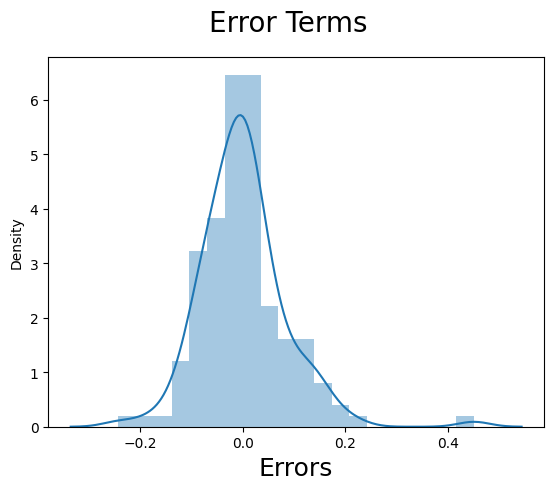

In [258]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [259]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [260]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [263]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
col2

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_rotor'],
      dtype='object')

In [265]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [266]:
vif

Features    VIF
0                const  23.59
2           enginesize   2.99
1             carwidth   2.97
3            boreratio   1.90
4               stroke   1.27
6     enginetype_rotor   1.14
5  enginelocation_rear   1.10

In [267]:
# Let's now get the variables we had manually selected
new_cols = ['enginesize', 'carwidth', 'boreratio', 'stroke', 'enginetype_rotor', 'enginelocation_rear']
X_test_rfe2 = X_test_rfe2[new_cols]
X_test_rfe2.head()

enginesize  carwidth  boreratio    stroke  enginetype_rotor  \
160    0.139623  0.341667   0.404762  0.424242                 0   
186    0.181132  0.433333   0.404762  0.611111                 0   
59     0.230189  0.516667   0.563492  0.606061                 0   
165    0.139623  0.308333   0.444444  0.449495                 0   
140    0.177358  0.291667   0.746032  0.227273                 0   

     enginelocation_rear  
160                    0  
186                    0  
59                     0  
165                    0  
140                    0

In [268]:
# Adding constant variable to test dataframe
X_test_rfe2 = sm.add_constant(X_test_rfe2)

# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

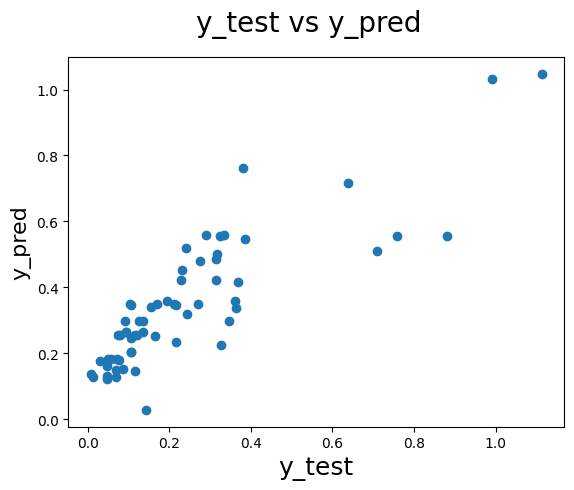

In [269]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [270]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5192677987670791

#### Checking the correlations between the final predictor variables

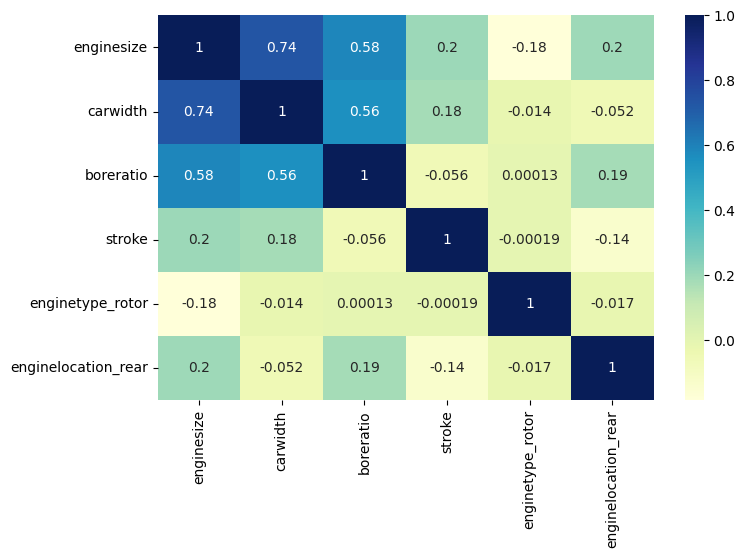

In [271]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(cars[new_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

Though this is the most simple model we've built till now, few final predictors still seem to have high correlations. One can go ahead and remove some of these features, though that will affect the adjusted-r2 score significantly (you should try doing that). 


Thus, for now, the final model consists of the 6 variables mentioned above.